# New York City Airbnb Open Data


## 1.1 Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данные о показателях Airbnb в Нью-Йорке, США (2019 г.)  - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

С 2008 года гости и хозяева используют Airbnb, чтобы расширить возможности путешествий и представить более уникальный и индивидуальный способ познания мира. Этот набор данных описывает активность и показатели листинга в Нью-Йорке, штат Нью-Йорк, за 2019 год.
Этот файл данных включает всю необходимую информацию, чтобы узнать больше о хостах, географической доступности, необходимых показателях, чтобы делать прогнозы и делать выводы.

## 1.2 На какие вопросы можно ответить с помощью этого датасета:
- Что мы можем узнать о разных хозяевах и территориях?
- Что мы можем узнать из отзывов? (например, места, цены, отзывы и т. д.)
- Какие хосты самые загруженные и почему?
- Есть ли заметная разница в трафике между разными районами и в чем может быть причина? 

## 1.3 Какие данные входят в датасет:
- id - идентификатор объявления 
- name - наименование объявления
- host ID - идентификатор хозяина
- host_name - имя хозяина
- neighbourhood_group - расположение
- neighbourhood - зона
- latitude - широта
- longitude - долгота
- room_type - тип жилья
- price - цена
- minimum_nights - минимальное количество ночей
- number_of_reviews - количество отзывов
- last_review - дата последнего отзыва
- reviews_per_month - количество отзывов за месяц
- calculated_host_listings_count - количество объявлений на хозяина
- availability_365 - количество дней, когда жилье было доступно для съема

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Чтение данных

In [2]:
data = pd.read_csv('/Users/a.fedorova/Desktop/AB_NYC_2019.csv')

In [3]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Рассмотрим основные характеристики датасета

In [4]:
# Размер датасета - 48895 строк, 16 колонок
data.shape

(48895, 16)

In [6]:
# Список колонок
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

id - 0
name - 16
host_id - 0
host_name - 21
neighbourhood_group - 0
neighbourhood - 0
latitude - 0
longitude - 0
room_type - 0
price - 0
minimum_nights - 0
number_of_reviews - 0
last_review - 10052
reviews_per_month - 10052
calculated_host_listings_count - 0
availability_365 - 0


In [11]:
# Основные статистические характеристки набора данных
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Рассмотрим визуальные характеристики датасета

### Чтобы понять, какие графики необходимо построить - попробуем ответить на вопросы, поставленные в начале работы

### - Что мы можем узнать о разных хозяевах и территориях?
Для начала рассмотрим, как часто люди сдают по 1 квартире, по несколько. Это поможет понять, как много пользователей используют этот способ заработка, как основной, и как много пользователей используют его, как источник дополнительного заработка?

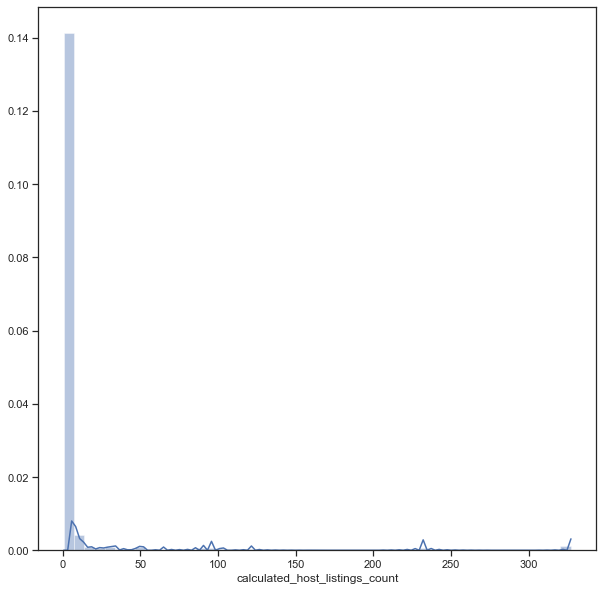

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['calculated_host_listings_count'])